## Arrays

#### Isomorphic

In [4]:
def isIsomorphic(s, t): 
        return [s.find(i) for i in s] == [t.find(j) for j in t]

In [5]:
s = "paper"
t = "title"

isIsomorphic(s,t)

True

In [7]:
[s.find(i) for i in s]

[0, 1, 0, 3, 4]

####   Minimum Index Sum of Two Lists

In [25]:
def findRestaurant(list1: list[str], list2: list[str]) -> list[str]:
    d = {l:i for i,l in enumerate(list1)}
    sm = {l:i+d[l] for i,l in enumerate(list2) if l in d}
    mn = min(v for v in sm.values())
    return [k for k,v in sm.items() if v == mn]

In [26]:
list1 = ["Shogun","Tapioca Express","Burger King","KFC"]
list2 = ["KFC","Shogun","Burger King"]
findRestaurant(list1, list2)

['Shogun']

#### Intersection of two arrays

In [19]:
from collections import Counter
def intersect(nums1: list[int], nums2: list[int]) -> list[int]:
        first = Counter(nums1)
        second = Counter(nums2)
        res = []
        for i in first:
            if i in second:
                res = res + [i] * min(first[i], second[i])
        return res

In [20]:
nums1 = [4,9,5]
nums2 = [9,4,9,8,4]

intersect(nums1, nums2)

[4, 9]

#### Contains duplicates in a list

In [21]:
def containsNearbyDuplicate(nums: list[int], k: int) -> bool:
        d = dict()
        
        for i,v in enumerate(nums):
            if v in d and i-d[v] <= k:
                return True
            d[v] = i
        return False

In [27]:
nums = [1,0,1,1]
k = 1
containsNearbyDuplicate(nums, k)

True

In [24]:
nums = [1,2,3,1,2,3]
k = 2
containsNearbyDuplicate(nums, k)

False

#### length of longest substring in array

In [25]:
def lengthOfLongestSubstring(s: str) -> int:
        encountered = dict()
        anchor = length = 0
        for i, c in enumerate(s):
            if c in encountered and encountered[c] >= anchor:
                print("if",anchor)
                anchor = encountered[c] + 1
                print(anchor)
            else:
                length = max(length, i + 1 - anchor)
                print("else", length)
            encountered[c] = i
            print(encountered)
        return length

In [ ]:
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        charSet = set()
        l = 0
        res = 0

        for r in range(len(s)):
            while s[r] in charSet:
                charSet.remove(s[l])
                l +=1
            charSet.add(s[r])
            res = max(res, r-l +1)
        return res

In [2]:
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        '''
        build a string, if we find a conflict then reset our string by removing all chars before the conflict 
        '''
        b = ''
        ans = 0
        for char in s:
            if char in b:
                b = b[b.index(char) + 1:] + char
            else:
                b += char
                ans = max(ans, len(b))
        
        return ans
    
Solution().lengthOfLongestSubstring("pwwkew")

3

In [26]:
lengthOfLongestSubstring("pwwkew")

else 1
{'p': 0}
else 2
{'p': 0, 'w': 1}
if 0
2
{'p': 0, 'w': 2}
else 2
{'p': 0, 'w': 2, 'k': 3}
else 3
{'p': 0, 'w': 2, 'k': 3, 'e': 4}
if 2
3
{'p': 0, 'w': 5, 'k': 3, 'e': 4}


3

In [14]:
lengthOfLongestSubstring("bbbbb")

1

In [15]:
lengthOfLongestSubstring("abcabcbb")

3

In [16]:
lengthOfLongestSubstring("dvdf")

3

#### 3Sum
Sum of 3 numbers equal to a target sum 0 in this case

For the main function:

Sort the input array nums.
Iterate through the array:
If the current value is greater than zero, break from the loop. Remaining values cannot sum to zero.
If the current value is the same as the one before, skip it.
Otherwise, call twoSumII for the current position i.
For twoSumII function:

Set the low pointer lo to i + 1, and high pointer hi to the last index.
While low pointer is smaller than high:
If sum of nums[i] + nums[lo] + nums[hi] is less than zero, increment lo.
If sum is greater than zero, decrement hi.
Otherwise, we found a triplet:
Add it to the result res.
Decrement hi and increment lo.
Increment lo while the next value is the same as before to avoid duplicates in the result.
Return the result res.

In [ ]:
class Solution:
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        res = []
        nums.sort()
        for i in range(len(nums)):
            if nums[i] > 0:
                break
            if i == 0 or nums[i - 1] != nums[i]:
                self.twoSumII(nums, i, res)
        return res

    def twoSumII(self, nums: List[int], i: int, res: List[List[int]]):
        lo, hi = i + 1, len(nums) - 1
        while (lo < hi):
            sum = nums[i] + nums[lo] + nums[hi]
            if sum < 0:
                lo += 1
            elif sum > 0:
                hi -= 1
            else:
                res.append([nums[i], nums[lo], nums[hi]])
                lo += 1
                hi -= 1
                while lo < hi and nums[lo] == nums[lo - 1]:
                    lo += 1

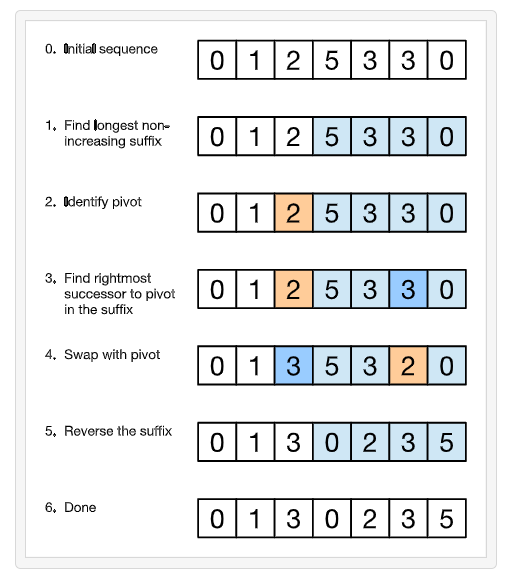

In [ ]:
class Solution:
    def nextPermutation(self, nums: List[int]) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        i = len(nums) -1
        
        while i > 0 and nums[i-1] >= nums[i]:
            i -=1
            
        if i <= 0:
            nums[:] = nums[::-1]
        else:
            j = len(nums)-1

            while nums[j] <= nums[i-1]:
                j -=1

            nums[i-1], nums[j] = nums[j], nums[i-1]

            nums[i:] = nums[len(nums)-1: i-1 : -1]
        